<a href="https://colab.research.google.com/github/Sugandaram/Pandas_Tasks/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [6]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [7]:
df.duplicated().value_counts()

False    15
dtype: int64

# **Data** **Plotting**

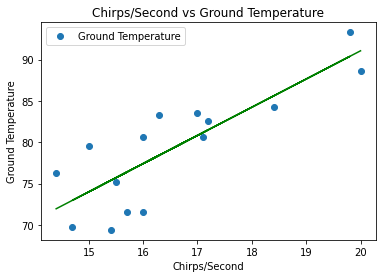

In [17]:
df.plot(x = "Chirps/Second", y = "Ground Temperature", style = "o")

plt.title("Chirps/Second vs Ground Temperature")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.plot(x, model.predict (x), color = 'green')
#plt.plot(y, model.predict (y), color = 'yellow')
plt.show()

# **Correlation** **Checking** 


In [9]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [10]:
y = df[["Ground Temperature"]].values
x = df[["Chirps/Second"]]

1.Find the linear regression equation for this data.

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [55]:
print('Coefficient :',model.coef_,'\nIntercept :',model.intercept_)


Coefficient : [[3.410323]] 
Intercept : [22.84898231]


In [57]:
#print("coefficient :",model.coef_)

In [56]:
#print("intercept: ", model.intercept_)

In [54]:
print("R^square value: ", model.score(x,y))

R^square value:  0.6922946529147003


In [50]:
print(f"Equation: y = {model.coef_} * x + {model.intercept_}")

Equation: y = [[3.410323]] * x + [22.84898231]


2.Chart the original data and the equation on the chart.

In [58]:
y_pred = model.predict(x)

In [59]:
pd.DataFrame({'Actual': [y], 'Predicted': [y_pred]})


,Actual,Predicted
0,"[[88.6], [71.6], [93.3], [84.3], [80.6], [75.2...","[[91.05544229832816], [77.4141503002759], [90...."


In [63]:
my_dict =   {'Actual':y,'Predicted':y_pred}
pd.DataFrame([my_dict])


,Actual,Predicted
0,"[[88.6], [71.6], [93.3], [84.3], [80.6], [75.2...","[[91.05544229832816], [77.4141503002759], [90...."


**3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [23]:
print("Score ; ", model.score(x,y))

Score ;  0.6922946529147003


4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [32]:
print("Rate:",model.predict([[95]]))

Rate: [[346.82966726]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [62]:
print("Ground:" ,(18 - model.intercept_)/model.coef_)

Ground: [[-1.42185427]]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = pd.read_fwf("brain_body.txt")

In [4]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [5]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [6]:
df.tail()

,Brain,Body
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5
61,4.235,50.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [8]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [11]:
df.isnull().sum()

print("No null vlaues in data")

No null vlaues in data


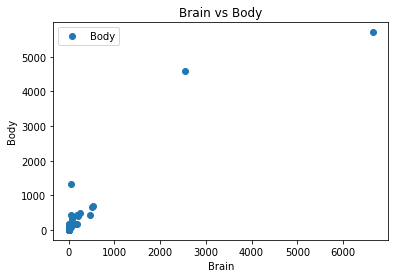

In [12]:
df.plot(x = "Brain", y = "Body", style = "o")
plt.title("Brain vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")
#plt.plot(x, model.predict (x), color = 'green')
#plt.plot(y, model.predict (y), color = 'yellow')
plt.show()

In [16]:
percentile25 =  df["Brain"].quantile(0.25)
print("25th pencentile of the data is ",percentile25)
print("IQR : ",percentile25)


25th pencentile of the data is  0.6000000000000001
IQR :  0.6000000000000001


In [21]:
percentile75 =  df["Brain"].quantile(0.75)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile75)

75th pencentile of the data is  48.2025
IQR :  48.2025


In [23]:
percentile25 =  df["Brain"].quantile(0.25)
percentile75 =  df["Brain"].quantile(0.75)
print("25th pencentile of the data is ",percentile25)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile25 + percentile75)


25th pencentile of the data is  0.6000000000000001
75th pencentile of the data is  48.2025
IQR :  48.8025


In [26]:
percentile25 =  df["Brain"].quantile(0.25)
percentile75 =  df["Brain"].quantile(0.75)
print("25th pencentile of the data is ",percentile25)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile25 - percentile75)

25th pencentile of the data is  0.6000000000000001
75th pencentile of the data is  48.2025
IQR :  -47.6025


In [27]:
percentile25 =  df["Brain"].quantile(0.25)
percentile75 =  df["Brain"].quantile(0.75)
print("25th pencentile of the data is ",percentile25)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile25 * percentile75)

25th pencentile of the data is  0.6000000000000001
75th pencentile of the data is  48.2025
IQR :  28.921500000000005


In [28]:
percentile25 =  df["Brain"].quantile(0.25)
percentile75 =  df["Brain"].quantile(0.75)
print("25th pencentile of the data is ",percentile25)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile25 / percentile75)

25th pencentile of the data is  0.6000000000000001
75th pencentile of the data is  48.2025
IQR :  0.012447487163528864


In [22]:
percentile25 =  df["Body"].quantile(0.25)
print("25th pencentile of the data is ",percentile25)
print("IQR : ",percentile25)

25th pencentile of the data is  4.25
IQR :  4.25


In [19]:
percentile75 =  df["Body"].quantile(0.75)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile75)


75th pencentile of the data is  166.0
IQR :  166.0


In [25]:
percentile25 =  df["Body"].quantile(0.25)
percentile75 =  df["Body"].quantile(0.75)
print("25th pencentile of the data is ",percentile25)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile25 + percentile75)


25th pencentile of the data is  4.25
75th pencentile of the data is  166.0
IQR :  170.25


In [29]:
percentile25 =  df["Body"].quantile(0.25)
percentile75 =  df["Body"].quantile(0.75)
print("25th pencentile of the data is ",percentile25)
print("75th pencentile of the data is ",percentile75)
print("IQR : ",percentile25 - percentile75)

25th pencentile of the data is  4.25
75th pencentile of the data is  166.0
IQR :  -161.75


In [49]:
#max_value = percentile75 + 1.5 * (percentile25-percentile75)
#print(max_value)

In [48]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
print(max_value)

408.625


In [39]:
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(min_value)

-238.375


In [38]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

408.625
-238.375


In [5]:
x = df.iloc[: , [0]]
y = df.iloc[: , 1]


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((12, 1), (3, 1))

**1. Find the linear regression equation for this data for brain weight to body weight.**

In [7]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
print('Coefficient :',model.coef_,'\nIntercept :',model.intercept_)


Coefficient : [2.81020291] 
Intercept : 34.22624425727411


In [13]:
print(f"Equation: y = {model.coef_} * x + {model.intercept_}")

Equation: y = [2.81020291] * x + 34.22624425727411


**2. Chart the original data and the equation on the chart.**

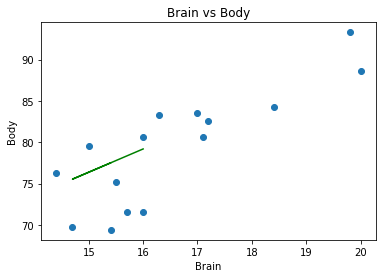

In [27]:
plt.scatter (x,y)
plt.title("Brain vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")

plt.plot(x_test,model.predict(x_test),color="green")

plt.show()


In [34]:
print("Score : ", model.score(x_test,y_test))

Score :  -54.26692281000389


**3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [35]:
print("Score : ", model.score(x,y))

Score :  0.6260754104265285


In [32]:
my_dict =   {'Actual':y,'Predicted':y}
pd.DataFrame([my_dict])


,Actual,Predicted
0,0 88.6 1 71.6 2 93.3 3 84.3 4 ...,0 88.6 1 71.6 2 93.3 3 84.3 4 ...


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [139]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [140]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [141]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [142]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [39]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [40]:
df.tail()

,Sex,Rank,Year,Degree,YSdeg,Salary
47,1,1,2,1,2,15350
48,0,1,1,1,1,16244
49,1,1,1,1,1,16686
50,1,1,1,1,1,15000
51,1,1,0,1,2,20300


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [44]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [45]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [143]:
df=df.drop_duplicates()

In [48]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

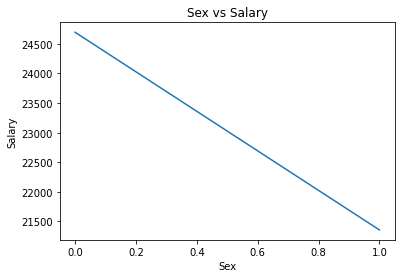

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [145]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

**1. Find the linear regression equation for this data using columns 1-5 to column 6**.

In [125]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [126]:
print("Intercept :",model.intercept_)


Intercept : 11410.14654725559


In [127]:
pd.DataFrame(model.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns = ["Coefficients"])

,Coefficients
Sex,1241.792500
Rank,5586.181450
Year,482.859768
Degree,-1331.644063
YSdeg,-128.790574


In [128]:
model.score(x_test,y_test)



0.9121527855627357

In [129]:
print("Equation : y =",end ='')
for i in range(0,5):
   print(f"({model.coef_[i]}) * x{i+1} + ", end = '')
print(model.intercept_)

Equation : y =(1241.792499601427) * x1 + (5586.1814495214385) * x2 + (482.85976782882153) * x3 + (-1331.6440634059095) * x4 + (-128.79057354486122) * x5 + 11410.14654725559


2. Find the selection of columns with the best  R2  score.

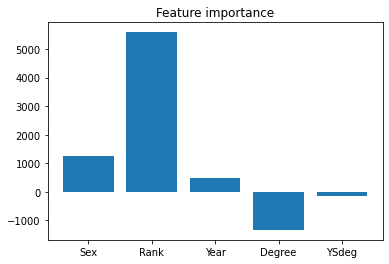

,Coefficients
Sex,1241.792500
Rank,5586.181450
Year,482.859768
Degree,-1331.644063
YSdeg,-128.790574


In [130]:
importance = model.coef_
plt.bar(x = ["Sex", "Rank", "Year", "Degree", "YSdeg"] , height = importance)
plt.title('Feature importance')
plt.show()
pd.DataFrame(model.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ['Coefficients'])

In [131]:
from itertools import combinations

cols = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
combos = list(combinations(cols,x+1) for x in range(len(cols)))

In [154]:
score_dict = {}
for i in range(len(combos)):
  for j in combos[i]:
    x = df
    y = df['Salary']
    LR = LinearRegression()
    LR.fit(x,y)
    score_dict[j] = LR.score(x,y)

In [119]:
print("R^square value: ", model.score(x,y))

R^square value:  0.8547180674410969


In [122]:
from itertools import combinations

from sklearn import linear_model

from sklearn.model_selection import train_test_split

cols = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
combos = list(combinations(cols,x+1) for x in range(len(cols)))

3. Report whether sex is a factor in salary.

In [146]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [147]:
corr = df.corr()["Salary"].sort_values(ascending = False)[1:]
corr

Rank      0.867488
Year      0.700669
YSdeg     0.674854
Degree   -0.069726
Sex      -0.252782
Name: Salary, dtype: float64

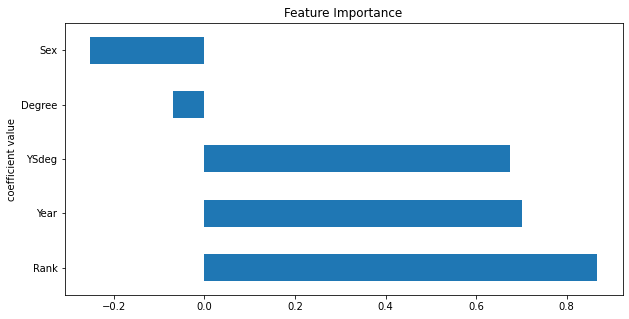

In [148]:
plt.figure(figsize=(10,5))
corr.plot(kind='barh') 
plt.title("Feature Importance")
plt.ylabel('coefficient value')
plt.show()

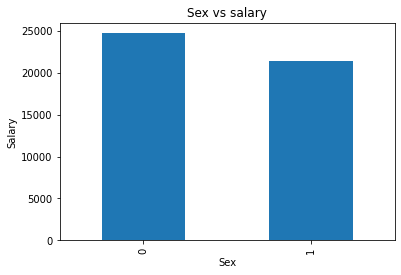

In [150]:
df.groupby('Sex')['Salary'].mean().plot(kind='bar')
plt.ylabel('Salary')
plt.title('Sex vs salary')
plt.show()

In [152]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000
